Tempo de execução com laço FOR: 0.5384150000000001


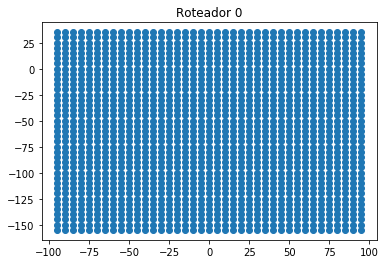

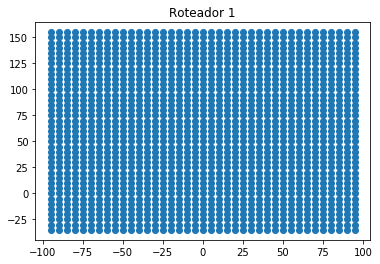

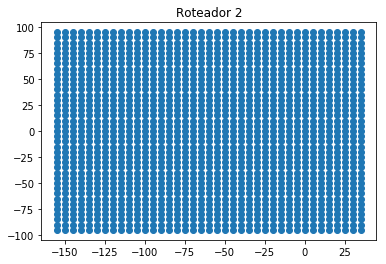

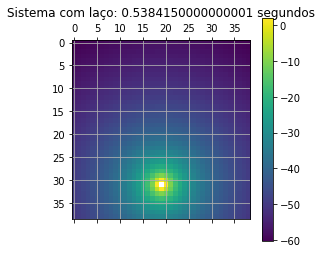

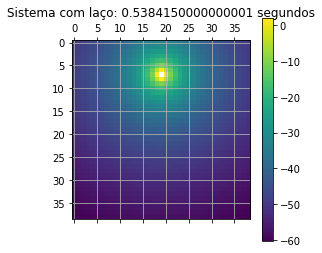

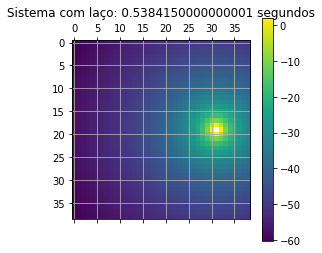

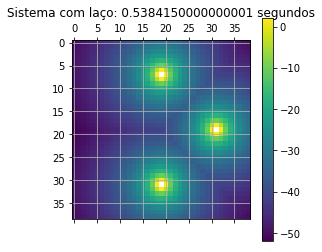

In [1]:
import warnings                        # Método para suprimir os avisos de exceções
warnings.filterwarnings('ignore')      # Método para suprimir os avisos de exceções
# Ex.: divisões por zero, que neste exemplo, não é um problema.

import time                            # Importa a biblioteca para as funções relacionadas a contagem de tempo
start_time = time.clock()              # Primeira medição de tempo: inicia a contagem
dPasso = 5                             # Resolução do grid: distância entre um passo e outro
dDim = 200                             # Dimensão do grid
nl = (dDim-2*dPasso)/dPasso + 1        # Número de pontos na medição
import numpy as np                     # Importa biblioteca para cálculos numéricos
# nl não é do tipo inteiro, e precisa ser na definição de px e py a seguir.
# Sugestão: comente a linha abaixo e observe a exceção que o interpretador/Python irá levantar
NL = int(nl)
px = np.ndarray([NL,NL],dtype=complex) # Criação de matriz de complexos (não inicializada)
py = np.ndarray([NL,NL],dtype=complex) # Criação de matriz de complexos (não inicializada)
# Montagem da Matriz com posição de cada ponto do grid (posição relativa ao canto inferior direito)
for i in range(NL):                    # Laço de 0 até NL-1
    for j in range(NL):                # Laço de 0 até NL-1
        px[i,j] = dPasso + j*dPasso    # j é a variável do iterador, sem relação com o complexo
        py[j,i] = px[i,j]

# Criação de matrizes de posição e potência recebida (não inicializadas)
pbs0 = np.ndarray([NL,NL], dtype=complex)
pbs1 = np.ndarray([NL,NL], dtype=complex)
pbs2 = np.ndarray([NL,NL], dtype=complex)
pl0  = np.ndarray([NL,NL])
pl1  = np.ndarray([NL,NL])
pl2  = np.ndarray([NL,NL])
plf  = np.ndarray([NL,NL])

for i in range(NL):
    for j in range(NL):
# Matrizes com posição de cada ponto do grid relativa a cada roteador
        pbs0[i,j] = px[i,j]+ 1j*py[i,j] - ( dDim/2 + 0.8*dDim*1j)
        pbs1[i,j] = px[i,j]+ 1j*py[i,j] - ( dDim/2 + 0.2*dDim*1j)
        pbs2[i,j] = px[i,j]+ 1j*py[i,j] - (dDim*0.8 + 0.5*dDim*1j)
# Cálculo da potência recebida em cada ponto do grid recebida de cada roteador
        pl0[i,j]=  10*np.log10(1/(np.absolute(pbs0[i,j])**4)/0.001)
        pl1[i,j]=  10*np.log10(1/(np.absolute(pbs1[i,j])**4)/0.001)
        pl2[i,j]=  10*np.log10(1/(np.absolute(pbs2[i,j])**4)/0.001)
# Cálculo da melhor potência em cada ponto do grid
        plf[i,j] = max(pl0[i,j],pl1[i,j])
        plf[i,j] = max(plf[i,j],pl2[i,j])

# Fim dos laços
stop_time = time.clock()               # Medição de tempo de execução
# A criação das matrizes e dos laços são a parte de interesse do algoritmo
# por isso a medição se encerra antes de fazermos a plotagem, que é meramente para visualização
tempo_de_execucao = stop_time - start_time
# Mostra tempo de execução na tela
print("Tempo de execução com laço FOR: "+str(tempo_de_execucao))

from matplotlib import pyplot as plt   # Importa pyplot, que possui as funções essenciais para plotag

plt.scatter(pbs0.real,pbs0.imag)       # Monta o plot do mapa de pontos do reteador 0
plt.title("Roteador 0")                # Configura o título do plot
plt.show()                             # Mostra o plot do mapa de pontos

plt.scatter(pbs1.real,pbs1.imag)       # Monta o plot do mapa de pontos do reteador 1
plt.title("Roteador 1")                # Configura o título do plot
plt.show()

plt.scatter(pbs2.real,pbs2.imag)
plt.title("Roteador 2")
plt.show()


plt.matshow(pl0)                       # Monta mapa de cores (colormap) para potência recebida do roteador 0
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)    # Título do mapa de cores (colormap) para potência recebida do roteador 0, incluindo tempo de execução

plt.matshow(pl1)                       # Monta mapa de cores (colormap) para potência recebida do roteador 0
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)      # Título do mapa de cores (colormap) para potência recebida do roteador 0, incluindo tempo de execução

plt.matshow(pl2)                       # Monta mapa de cores (colormap) para potência recebida do roteador 0
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)      # Título do mapa de cores (colormap) para potência recebida do roteador 0, incluindo tempo de execução

# Monta mapa de cores de melhor potência recebida em cada ponto do grid (melhor entre os dois roteadores)
plt.matshow(plf)
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de melhor potência recebida em cada ponto do grid (melhor entre os dois roteadores)
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)
plt.show() # Mostra todos os plots mon